In [8]:
#Implementing logistic regression.

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


X_train = pd.read_csv("Logistic_X_Train.csv")
Y_train = pd.read_csv("Logistic_Y_Train.csv")
X_test = pd.read_csv("Logistic_X_Test.csv")


X = X_train.values
Y = Y_train.values
x = X_test.values

print(X.shape)
print(Y.shape)
print(x.shape)


ones = np.ones((X.shape[0],1))
X_train = np.hstack((ones,X))


def sigmoid(z):                       #Logistic regression uses sigmoid function as the hypothesis function.
    return (1.0/(1.0+np.exp(-1.0*z)))

def hypothesis(X,theta):              
    return sigmoid(np.dot(X,theta))

def error(X,y,theta):                #Error function is negative of log likelihood.
    hx=hypothesis(X,theta)
    m=X.shape[0]
    err_vec=y*np.log2(hx)+(1-y)*np.log2(1-hx)
    err_val=err_vec.sum()
    return -err_val/m

def gradient(y,X,theta):
    m=X.shape[0]
    hx=hypothesis(X,theta)
    grad=np.dot((X.T),(y-hx))
    return grad/m

def predict(x,theta):
    confidence=hypothesis(x,theta)
    if confidence<0.5:
        return 0
    else:
        return 1
    
def accuracy(X,Y,theta):
    y_pred=[]
    for i in range(Y.shape[0]):
        p=predict(X[i],theta)
        y_pred.append(p)
    y_pred=np.array(y_pred)
    correct_pred = 0.0
    for i in range(Y.shape[0]):
        if y_pred[i]==Y[i]:
            correct_pred+=1
    acc = correct_pred/Y.shape[0]
    return acc*100

def gradientDescent(X,Y,learning_rate=0.5,maxiter=500):
    theta=np.zeros((X.shape[1],1))
    err_list=[]
    acc_list = []
    for i in range(maxiter):   
        e=error(X,Y,theta)
        grad=gradient(Y,X,theta)
        acc = accuracy(X,Y,theta)
        acc_list.append(acc)
        theta=theta+learning_rate*grad
        err_list.append(e)
    return err_list,theta,acc_list


err_list,theta,acc_list=gradientDescent(X_train,Y)
acc = accuracy(X_train,Y,theta)
print(acc)

#Making predictions for testing data set.

ones1 = np.ones((x.shape[0],1))
x_test = np.hstack((ones1,x))

results=[]                             
for i in range(x.shape[0]):
    results.append(predict(x_test[i],theta))
    
#Creating a csv file for the predictions.    
    
df=pd.DataFrame(data=results,columns=['label'])
df.to_csv('Chemical_Classification_Predictions.csv',index=False)   
    

print(theta)


(3000, 3)
(3000, 1)
(1000, 3)
99.4
[[-2.75210904]
 [-2.91440796]
 [ 2.17155964]
 [-2.43997977]]


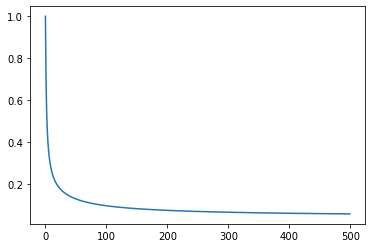

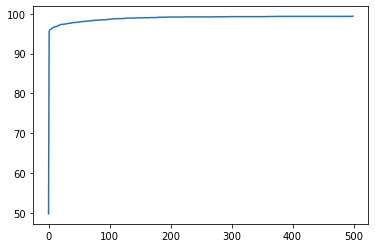

f:\harry potter\lib\site-packages\matplotlib\collections.py:886: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


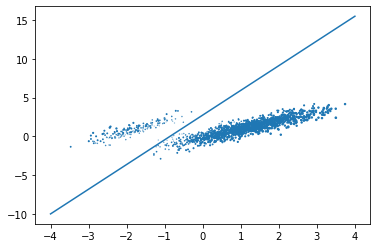

In [9]:
#Plotting different curves and decision boundary.

hx = hypothesis(X_train,theta)

plt.plot(err_list)
plt.show()
plt.plot(acc_list)
plt.show()


plt.scatter(X[:,0],X[:,1],X[:,2])
x = np.linspace(-4,4,10)

y = -(theta[0] + theta[1]*x + theta[2]*x + theta[3]*x)
plt.plot(x,y)
plt.show()